<a href="https://colab.research.google.com/github/kweteM/myproject/blob/master/Resume_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing PyMuPDF to be able to use fitz module

In [1]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 37.6 MB/s eta 0:00:00


**Importing Required Libraries**

In [2]:
import fitz
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import matplotlib.pyplot as plt

**Creating a function to extract text from PDF file**

In [3]:
def extract_text_from_pdf(pdf_path):
    text = ''
    with fitz.open(pdf_path) as doc:
        for page_num in range(doc.page_count):
            page = doc.load_page(page_num)
            text += page.get_text()
    return text

**Creating a function to clean text**

In [4]:
def clean_text(text):
    # Remove non-alphanumeric characters and extra whitespaces
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

**Loading spaCy model**

In [5]:
nlp = spacy.load("en_core_web_sm")

**Creating a function to tokenize and lemmatize text**

In [6]:

def tokenize_and_lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return tokens

**Creating a function to calculate similarity between resume and job description**

In [7]:
def calculate_similarity(resume_text, job_description_text):
    vectorizer = TfidfVectorizer(tokenizer=tokenize_and_lemmatize)
    tfidf_matrix = vectorizer.fit_transform([resume_text, job_description_text])
    similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    return similarity_score

**Uploading resume and job description**

In [8]:
resume_path = '/content/Resume.pdf'
job_description_path = '/content/Job_description.txt'

**Using the extracting function to extract text from resume and job description**

In [9]:
resume_text = extract_text_from_pdf(resume_path)
job_description_text = open(job_description_path, 'r').read()

**Using the cleaning function to clean text**

In [10]:
resume_text_cleaned = clean_text(resume_text)
job_description_text_cleaned = clean_text(job_description_text)

**Printing out the cleaned version of resume and job description**

In [11]:
print(resume_text_cleaned)

Erick Kwete Selfmotivated hardworking and highly passionate Data scientist 10N Moi drive road Umoja 1 APT 17 Nairobi Kenya 254 717026758 mingakweteerickregmailcom httpsgithubcomkweteM wwwlinkedincominerickkwetea 91482166 EXPERIENCE Personal Projects Online Data Scientist JUNE 2021 PRESENT Dedicating hours daily to gain handson work experience through my personal data science projects REFUNITE Uganda Humanitarian Worker Team Leader MARCH 2017 PRESENT Working as an aid worker and the team leader of a team of call center specialists from a humanitarian NGO KenCall Kenya Customer service Representative AUGUST 2013 OCTOBER 2016 Making outbound and inbound calls to reconnect refugees across the world EDUCATION University of the People California USA Degree JUNE 2019 MAY 2023 University of the People Distance education university Bachelors degree Computer Science CGPA 285 SoloLearn Inc San Francisco Certicate JANUARY 2021 FEBRUARY 2021 Studied Machine Learning and Data Science Prospre Institu

In [12]:
print(job_description_text_cleaned)

JOB DESCRIPTIONS Data Scientist We are seeking a highly motivated and experienced Data Scientist to join our dynamic team The ideal candidate will have a strong background in data science with a proven track record of delivering impactful datadriven solutions Responsibilities include collaborating with crossfunctional teams to identify business opportunities analyzing large datasets developing predictive models and communicating insights to stakeholders The Data Scientist will be responsible for endtoend data science projects from data collection and preprocessing to model development and deployment They will leverage statistical modeling and machine learning techniques to extract insights and drive informed decisionmaking within the organization The successful candidate will have a solid understanding of programming languages such as Python or R and experience with data manipulation and analysis tools eg pandas NumPy They will possess a deep understanding of machine learning algorithm

**Using the calculating function to calculate similarity between resume and job description and printing the result in percentage**

In [13]:
similarity_score = calculate_similarity(resume_text_cleaned, job_description_text_cleaned)
similarity_percentage = round(similarity_score * 100, 2)
print(f"Similarity Score: {similarity_percentage}%")

Similarity Score: 17.82%


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Plotting the result**

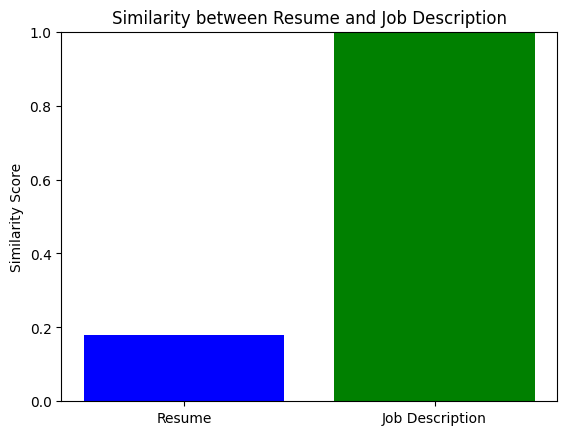

In [15]:
labels = ['Resume', 'Job Description']
scores = [similarity_score, 1 - similarity_score]

plt.bar(['Resume', 'Job Description'], [similarity_score, 1], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Similarity Score')
plt.title('Similarity between Resume and Job Description')
plt.show()

**Saving the model**

In [16]:
model_filename = 'resume_scanner_model.pkl'
joblib.dump(similarity_score, model_filename)
print(f"Model saved as {model_filename}")

Model saved as resume_scanner_model.pkl
